<a href="https://colab.research.google.com/github/ishanRepo/Data-Analysis/blob/master/ImgClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
get_ipython().run_line_magic('matplotlib','inline')

In [4]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train,y_train), (x_test,y_test) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

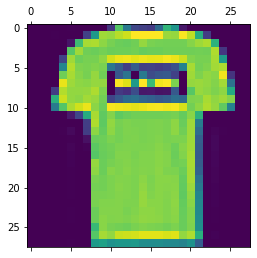

In [6]:
plt.matshow(x_train[1])

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7338 - accuracy: 0.7641
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5110 - accuracy: 0.8261
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4681 - accuracy: 0.8385
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4437 - accuracy: 0.8463
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4261 - accuracy: 0.8518
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4132 - accuracy: 0.8565
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4025 - accuracy: 0.8586
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3925 - accuracy: 0.8637
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3846 - accuracy: 0.8658
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.375

In [11]:
test_loss,test_acc= model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.8538


In [ ]:
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

Loss=0.410
Accuracy=0.855


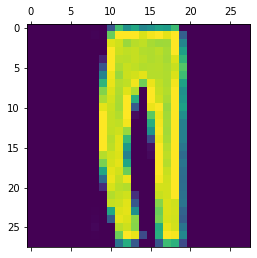

In [12]:
plt.matshow(x_test[2])

In [ ]:
x_test.shape

(10000, 28, 28)

In [13]:
predicted_value = model.predict(x_test)
predicted_value.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [14]:
predicted_value[1]

array([6.1878411e-04, 9.4010773e-07, 9.7399628e-01, 9.0944968e-06,
       1.0717076e-02, 6.8678579e-10, 1.4599763e-02, 1.3287483e-11,
       5.8123431e-05, 1.4598874e-11], dtype=float32)

In [ ]:
np.argmax(predicted_value[1])

2

In [ ]:
class_labels =["Tshirt","Trouser","Pullover","Dress","coat","sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_labels[np.argmax(predicted_value[1])]

'Pullover'

In [ ]:
get_ipython().run_line_magic('pinfo2', 'history.history')

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

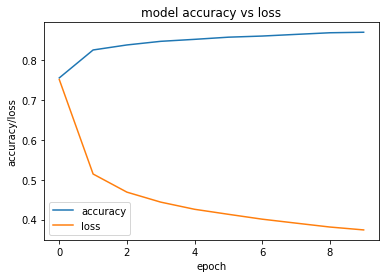

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='best')
plt.show()